In [ ]:
#Assignment 2: Reinforcement Learning

In [ ]:
#z5616675 kehan xue 

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
from tqdm import tqdm
# Import the environment
from env import GridWorldEnv
# Set random seed for reproducibility
np.random.seed(42)
# Configure plotting for notebook
%matplotlib inline
plt.style.use('default')

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
# parameters超参数（保持与 Task 2-4 一致）
alpha = 0.01              # 学习率
gamma = 0.99             # 折扣因子
epsilon = 1.0            # 初始 epsilon
epsilon_min = 0.05       # 最小 epsilon
epsilon_decay = 0.995    # epsilon 衰减系数
num_episodes = 500
max_steps = 100

# 状态空间：11x11，动作空间：4
q_table = np.zeros((11, 11, 4))  # Q-table 初始化


In [5]:
#Task 1: Implement Q-learning

In [6]:
from tqdm import tqdm

# 记录指标
episode_rewards = []
episode_steps = []
episode_success = []

env = GridWorldEnv(seed=42)

for episode in tqdm(range(num_episodes), desc="Training Q-learning Agent"):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    for _ in range(max_steps):
        x, y = state
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(q_table[x, y])
        
        next_state, reward, done, _ = env.step(action)
        nx, ny = next_state

        # Q-learning 更新公式
        best_next_action = np.argmax(q_table[nx, ny])
        td_target = reward + gamma * q_table[nx, ny, best_next_action]
        td_error = td_target - q_table[x, y, action]
        q_table[x, y, action] += alpha * td_error

        total_reward += reward
        state = next_state
        steps += 1

        # ✅ 添加渲染（仅可视化最后10轮）
        if episode >= num_episodes - 10:
            env.render(
                episode=episode,
                learning_type="Q-learning"
            )

        if done:
            break

    # 衰减 epsilon  exponential decay
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # 记录每轮结果
    episode_rewards.append(total_reward)
    episode_steps.append(steps)
    episode_success.append(1 if done else 0)

# ✅ 训练完成后可手动关闭窗口
env.close()


Training Q-learning Agent: 100%|█████████████████████████████████████████████████████| 500/500 [00:50<00:00,  9.92it/s]


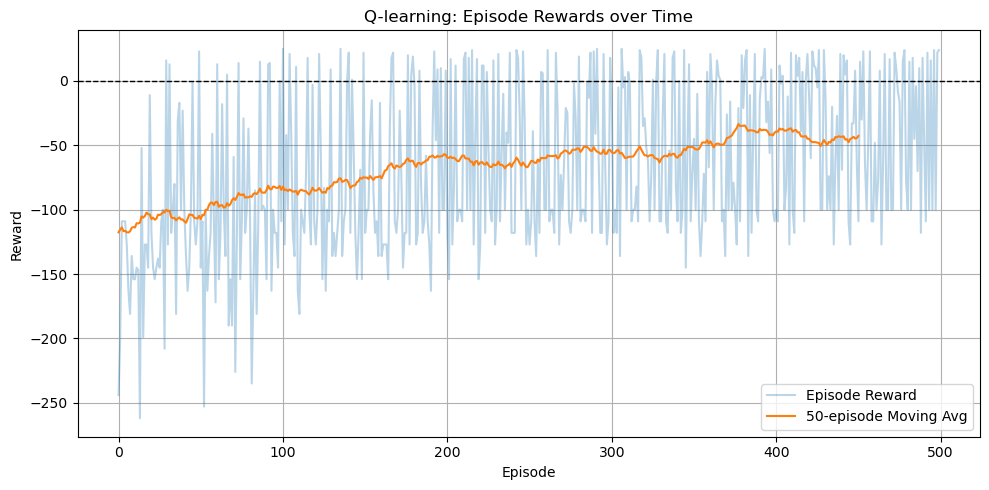

In [7]:
# 计算移动平均
def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

# 绘图
plt.figure(figsize=(10,5))
plt.plot(episode_rewards, alpha=0.3, label='Episode Reward')
plt.plot(moving_average(episode_rewards), label='50-episode Moving Avg')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning: Episode Rewards over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
N = num_episodes
success_rate = 100 * sum(episode_success) / N
average_reward = sum(episode_rewards) / N
average_learning_speed = 1 / (sum(episode_steps) / N)

print(f"Success Rate: {success_rate:.2f}%")
print(f"Average Reward per Episode: {average_reward:.2f}")
print(f"Average Learning Speed (1 / avg steps): {average_learning_speed:.4f}")


Success Rate: 84.80%
Average Reward per Episode: -22.16
Average Learning Speed (1 / avg steps): 0.0283


In [23]:
np.save("q_table_qlearning.npy", q_table)


In [24]:
#Task 2: SARSA Implementation

In [25]:
q_table_sarsa = np.zeros((11, 11, 4))

In [26]:
from tqdm import tqdm

episode_rewards_sarsa = []
episode_steps_sarsa = []
episode_success_sarsa = []

env = GridWorldEnv(seed=42)

for episode in tqdm(range(num_episodes), desc="Training SARSA Agent"):
    state = env.reset()
    x, y = state

    # ε-greedy 动作选择
    if np.random.rand() < epsilon:
        action = np.random.randint(0, 4)
    else:
        action = np.argmax(q_table_sarsa[x, y])

    total_reward = 0
    steps = 0
    done = False

    for _ in range(max_steps):
        next_state, reward, done, _ = env.step(action)
        nx, ny = next_state

        # 下一动作按当前策略选（on-policy）
        if np.random.rand() < epsilon:
            next_action = np.random.randint(0, 4)
        else:
            next_action = np.argmax(q_table_sarsa[nx, ny])

        # SARSA 更新规则
        td_target = reward + gamma * q_table_sarsa[nx, ny, next_action]
        td_error = td_target - q_table_sarsa[x, y, action]
        q_table_sarsa[x, y, action] += alpha * td_error

        total_reward += reward
        state = next_state
        x, y = state
        action = next_action
        steps += 1

        # ✅ 添加可视化渲染（只显示最后10轮）
        if episode >= num_episodes - 10:
            env.render(
                episode=episode,
                learning_type="SARSA"
            )

        if done:
            break

    # 衰减 epsilon
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    episode_rewards_sarsa.append(total_reward)
    episode_steps_sarsa.append(steps)
    episode_success_sarsa.append(1 if done else 0)

# ✅ 可选：关闭窗口
env.close()


Training SARSA Agent: 100%|██████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 25.37it/s]


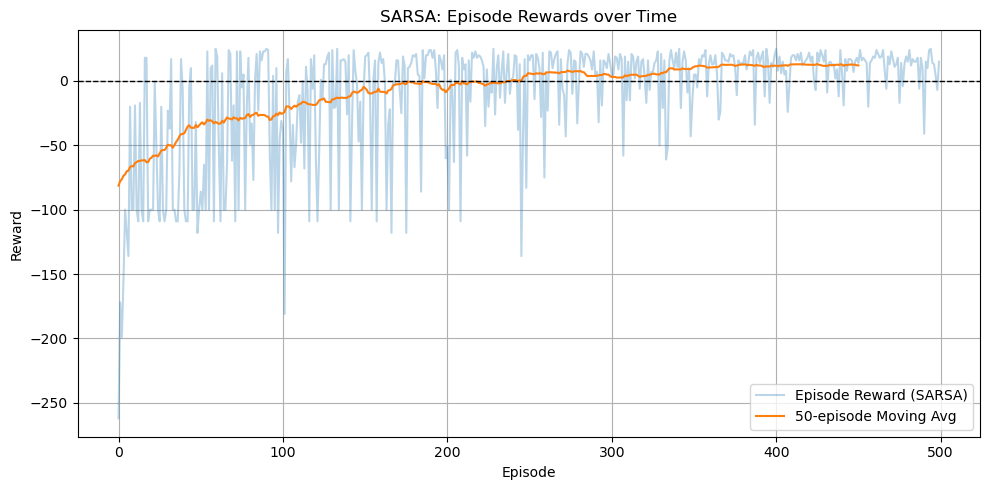

In [27]:
def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10,5))
plt.plot(episode_rewards_sarsa, alpha=0.3, label='Episode Reward (SARSA)')
plt.plot(moving_average(episode_rewards_sarsa), label='50-episode Moving Avg')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('SARSA: Episode Rewards over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
N = num_episodes
success_rate_sarsa = 100 * sum(episode_success_sarsa) / N
average_reward_sarsa = sum(episode_rewards_sarsa) / N
average_learning_speed_sarsa = 1 / (sum(episode_steps_sarsa) / N)

print(f"Success Rate: {success_rate_sarsa:.2f}%")
print(f"Average Reward per Episode: {average_reward_sarsa:.2f}")
print(f"Average Learning Speed (1 / avg steps): {average_learning_speed_sarsa:.4f}")


Success Rate: 87.80%
Average Reward per Episode: -10.82
Average Learning Speed (1 / avg steps): 0.0320


In [29]:
np.save("q_table_sarsa.npy", q_table_sarsa)


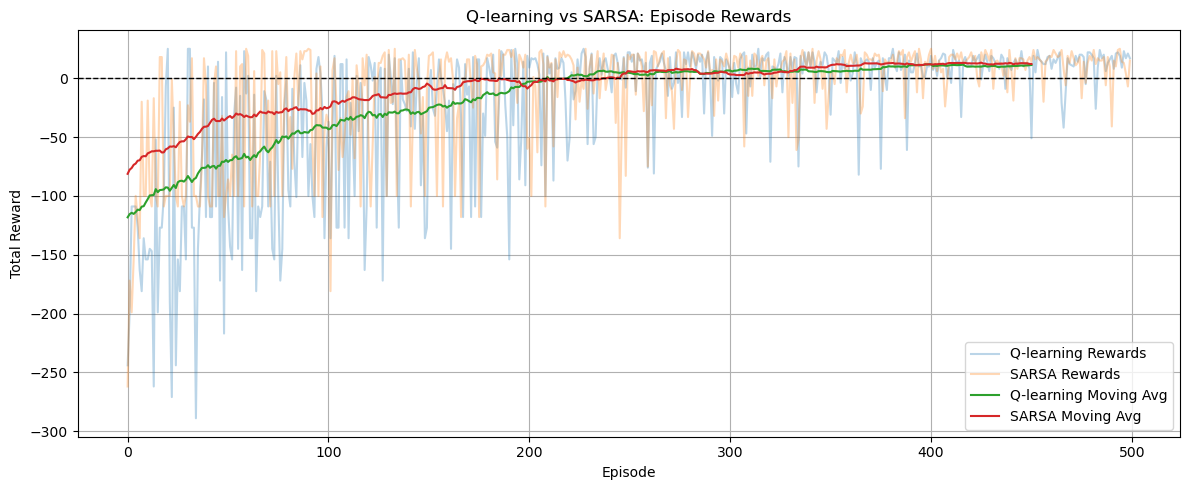

In [30]:
def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12, 5))

# Raw episode rewards
plt.plot(episode_rewards, alpha=0.3, label='Q-learning Rewards')
plt.plot(episode_rewards_sarsa, alpha=0.3, label='SARSA Rewards')

# Moving averages
plt.plot(moving_average(episode_rewards), label='Q-learning Moving Avg')
plt.plot(moving_average(episode_rewards_sarsa), label='SARSA Moving Avg')

# y=0 参考线
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-learning vs SARSA: Episode Rewards")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


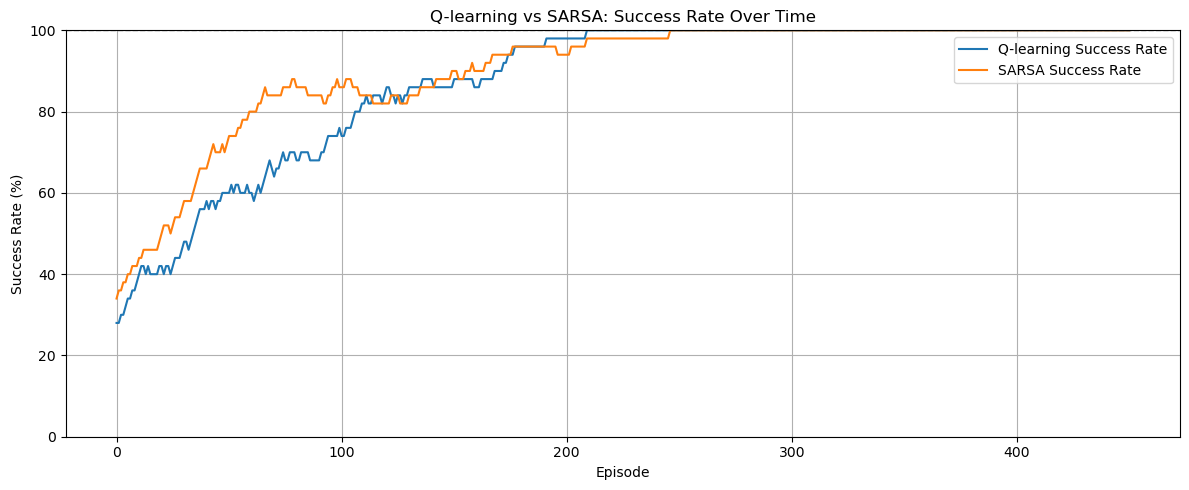

In [31]:
def rolling_success_rate(success_list, window=50):
    return np.convolve(success_list, np.ones(window), mode='valid') / window * 100

plt.figure(figsize=(12, 5))

plt.plot(rolling_success_rate(episode_success), label='Q-learning Success Rate')
plt.plot(rolling_success_rate(episode_success_sarsa), label='SARSA Success Rate')

plt.ylim(0, 100)
plt.axhline(100, color='grey', linestyle='--', linewidth=1)
plt.xlabel("Episode")
plt.ylabel("Success Rate (%)")
plt.title("Q-learning vs SARSA: Success Rate Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Q-learning
N = len(episode_rewards)
q_success = 100 * sum(episode_success) / N
q_avg_reward = sum(episode_rewards) / N
q_speed = 1 / (sum(episode_steps) / N)

# SARSA
s_success = 100 * sum(episode_success_sarsa) / N
s_avg_reward = sum(episode_rewards_sarsa) / N
s_speed = 1 / (sum(episode_steps_sarsa) / N)

print("== Q-learning ==")
print(f"Success Rate: {q_success:.2f}%")
print(f"Average Reward: {q_avg_reward:.2f}")
print(f"Learning Speed: {q_speed:.4f}\n")

print("== SARSA ==")
print(f"Success Rate: {s_success:.2f}%")
print(f"Average Reward: {s_avg_reward:.2f}")
print(f"Learning Speed: {s_speed:.4f}")


== Q-learning ==
Success Rate: 84.80%
Average Reward: -22.16
Learning Speed: 0.0283

== SARSA ==
Success Rate: 87.80%
Average Reward: -10.82
Learning Speed: 0.0320


In [4]:
#Task 3: Q-learning with Teacher

In [33]:
teacher_q = np.load("q_table_qlearning.npy")


In [34]:
def teacher_action(state, teacher_q, availability, accuracy):
    if np.random.rand() < availability:
        x, y = state
        best_action = np.argmax(teacher_q[x, y])
        if np.random.rand() < accuracy:
            return best_action
        else:
            others = [a for a in range(4) if a != best_action]
            return np.random.choice(others)
    return None


In [36]:
def train_q_student_with_teacher(availability, accuracy, teacher_q, episodes=300):
    q_table = np.zeros((11, 11, 4))
    epsilon = 1.0
    rewards = []
    success_list = []
    steps_list = []

    env = GridWorldEnv(seed=42)

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        done = False

        while not done and steps < 100:
            x, y = state
            suggested_action = teacher_action(state, teacher_q, availability, accuracy)
            if suggested_action is not None:
                action = suggested_action
            else:
                if np.random.rand() < epsilon:
                    action = np.random.randint(4)
                else:
                    action = np.argmax(q_table[x, y])

            next_state, reward, done, _ = env.step(action)
            nx, ny = next_state
            best_next_action = np.argmax(q_table[nx, ny])
            td_target = reward + gamma * q_table[nx, ny, best_next_action]
            q_table[x, y, action] += alpha * (td_target - q_table[x, y, action])

            state = next_state
            total_reward += reward
            steps += 1

            # ✅ 渲染最后 5 个 episodes（可调）
            if ep >= episodes - 1:
                env.render(
                    episode=ep,
                    learning_type="Q-learning + Teacher",
                    availability=availability,
                    accuracy=accuracy
                )

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        rewards.append(total_reward)
        success_list.append(1 if done else 0)
        steps_list.append(steps)

    env.close()

    avg_reward = np.mean(rewards)
    success_rate = 100 * np.mean(success_list)
    learning_speed = 1 / np.mean(steps_list)
    return rewards, success_rate, learning_speed


In [37]:
availability_values = [0.1, 0.3, 0.5, 0.7, 1.0]
accuracy_values = [0.1, 0.3, 0.5, 0.7, 1.0]

results = []
reward_curves = {}

for acc in accuracy_values:
    for avail in availability_values:
        rewards, success, speed = train_q_student_with_teacher(avail, acc, teacher_q)
        results.append({
            'Availability': avail,
            'Accuracy': acc,
            'Avg Reward': np.mean(rewards),
            'Success Rate (%)': success,
            'Avg Learning Speed': speed
        })
        reward_curves[(avail, acc)] = rewards
        print(f"Done: avail={avail}, acc={acc}")



Done: avail=0.1, acc=0.1
Done: avail=0.3, acc=0.1
Done: avail=0.5, acc=0.1
Done: avail=0.7, acc=0.1
Done: avail=1.0, acc=0.1
Done: avail=0.1, acc=0.3
Done: avail=0.3, acc=0.3
Done: avail=0.5, acc=0.3
Done: avail=0.7, acc=0.3
Done: avail=1.0, acc=0.3
Done: avail=0.1, acc=0.5
Done: avail=0.3, acc=0.5
Done: avail=0.5, acc=0.5
Done: avail=0.7, acc=0.5
Done: avail=1.0, acc=0.5
Done: avail=0.1, acc=0.7
Done: avail=0.3, acc=0.7
Done: avail=0.5, acc=0.7
Done: avail=0.7, acc=0.7
Done: avail=1.0, acc=0.7
Done: avail=0.1, acc=1.0
Done: avail=0.3, acc=1.0
Done: avail=0.5, acc=1.0
Done: avail=0.7, acc=1.0
Done: avail=1.0, acc=1.0


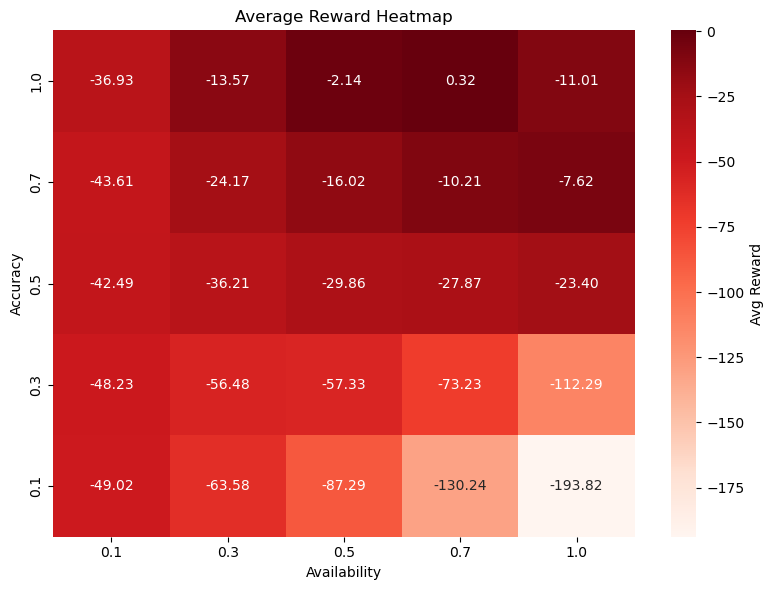

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_heatmap(df, metric, title):
    pivot = df.pivot(index='Accuracy', columns='Availability', values=metric)
    pivot = pivot.sort_index(ascending=False)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': metric})
    plt.title(title)
    plt.xlabel("Availability")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

df = pd.DataFrame(results) #应该在此之前构建好
plot_heatmap(df, "Avg Reward", "Average Reward Heatmap")



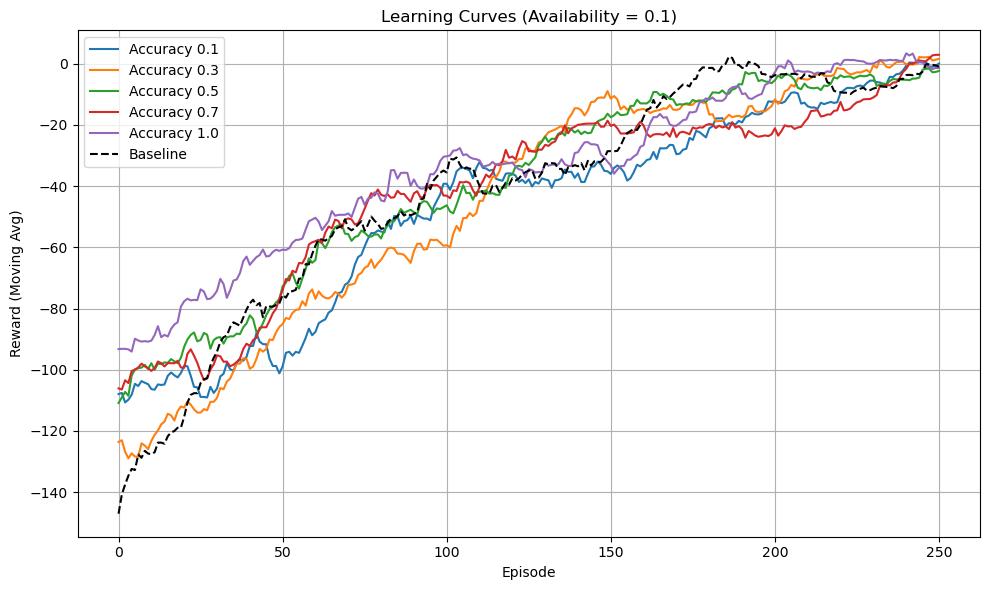

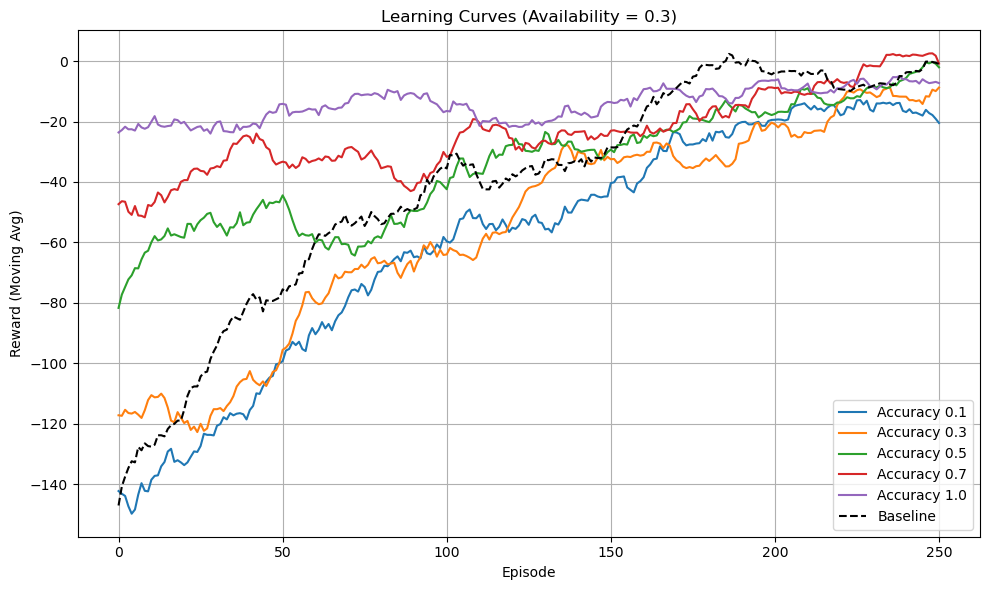

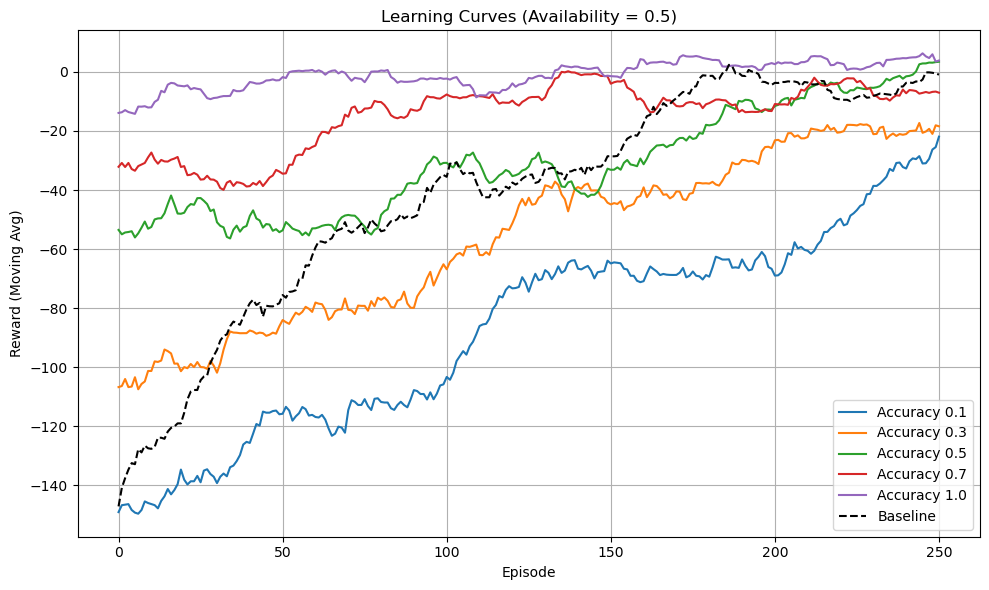

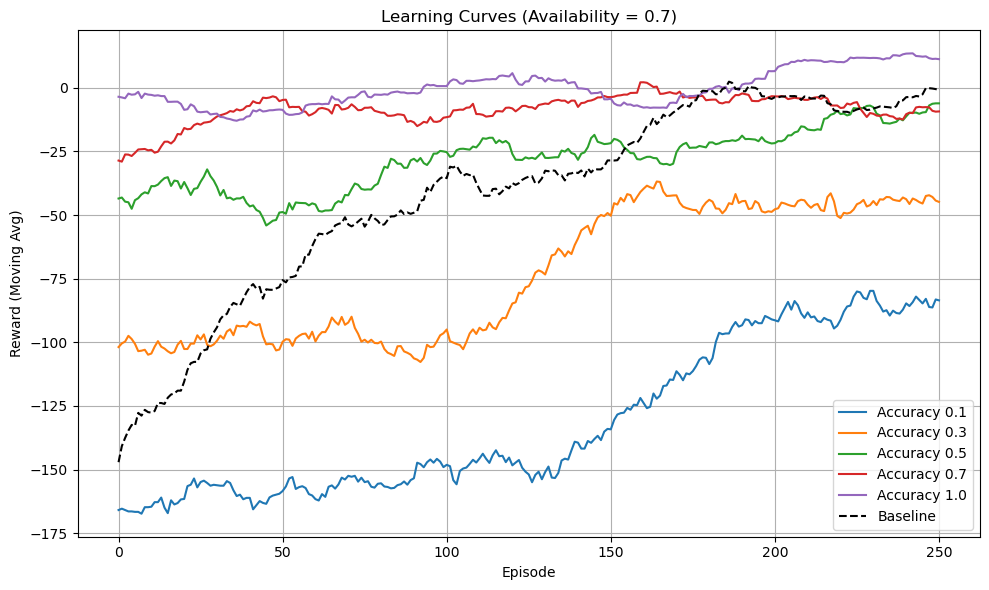

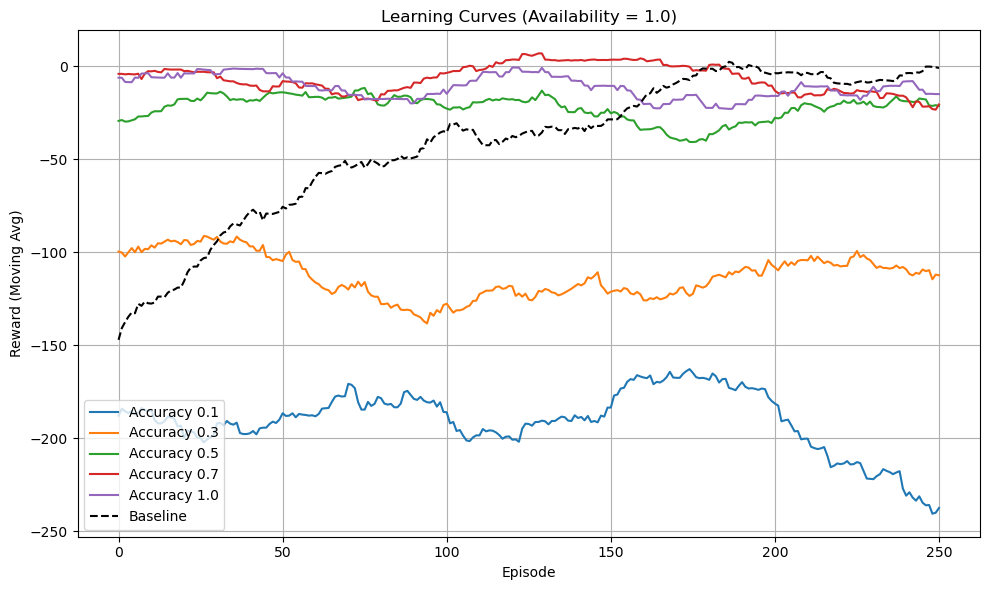

In [40]:
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_learning_curves(availability, baseline_rewards, reward_curves):
    plt.figure(figsize=(10, 6))
    for acc in accuracy_values:
        rewards = reward_curves[(availability, acc)]
        plt.plot(moving_average(rewards), label=f"Accuracy {acc}")
    
    plt.plot(moving_average(baseline_rewards), label="Baseline", linestyle='--', color='black')
    plt.title(f"Learning Curves (Availability = {availability})")
    plt.xlabel("Episode")
    plt.ylabel("Reward (Moving Avg)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# baseline（无教师）
baseline_rewards, _, _ = train_q_student_with_teacher(0.0, 0.0, np.zeros((11, 11, 4)))

# 画多个 availability 对应的图
for avail in availability_values:
    plot_learning_curves(avail, baseline_rewards, reward_curves)


In [5]:
#Task 4: SARSA with Teacher

In [41]:
teacher_q_sarsa = np.load("q_table_sarsa.npy")


In [43]:
def train_sarsa_student_with_teacher(availability, accuracy, teacher_q, episodes=300):
    q_table = np.zeros((11, 11, 4))
    epsilon = 1.0
    rewards = []
    success_list = []
    steps_list = []

    env = GridWorldEnv(seed=42)

    for ep in range(episodes):
        state = env.reset()
        x, y = state
        suggested_action = teacher_action(state, teacher_q, availability, accuracy)
        if suggested_action is not None:
            action = suggested_action
        else:
            if np.random.rand() < epsilon:
                action = np.random.randint(4)
            else:
                action = np.argmax(q_table[x, y])

        total_reward = 0
        steps = 0
        done = False

        while not done and steps < 100:
            next_state, reward, done, _ = env.step(action)
            nx, ny = next_state
            suggested_next_action = teacher_action(next_state, teacher_q, availability, accuracy)
            if suggested_next_action is not None:
                next_action = suggested_next_action
            else:
                if np.random.rand() < epsilon:
                    next_action = np.random.randint(4)
                else:
                    next_action = np.argmax(q_table[nx, ny])

            td_target = reward + gamma * q_table[nx, ny, next_action]
            q_table[x, y, action] += alpha * (td_target - q_table[x, y, action])

            state = next_state
            x, y = state
            action = next_action
            total_reward += reward
            steps += 1

        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        rewards.append(total_reward)
        success_list.append(1 if done else 0)
        steps_list.append(steps)

    avg_reward = np.mean(rewards)
    success_rate = 100 * np.mean(success_list)
    learning_speed = 1 / np.mean(steps_list)
    return rewards, success_rate, learning_speed


In [44]:
availability_values = [0.1, 0.3, 0.5, 0.7, 1.0]
accuracy_values = [0.1, 0.3, 0.5, 0.7, 1.0]

results_sarsa = []
reward_curves_sarsa = {}

for acc in accuracy_values:
    for avail in availability_values:
        rewards, success, speed = train_sarsa_student_with_teacher(avail, acc, teacher_q_sarsa)
        results_sarsa.append({
            'Availability': avail,
            'Accuracy': acc,
            'Avg Reward': np.mean(rewards),
            'Success Rate (%)': success,
            'Avg Learning Speed': speed
        })
        reward_curves_sarsa[(avail, acc)] = rewards
        print(f"SARSA Done: avail={avail}, acc={acc}")



SARSA Done: avail=0.1, acc=0.1
SARSA Done: avail=0.3, acc=0.1
SARSA Done: avail=0.5, acc=0.1
SARSA Done: avail=0.7, acc=0.1
SARSA Done: avail=1.0, acc=0.1
SARSA Done: avail=0.1, acc=0.3
SARSA Done: avail=0.3, acc=0.3
SARSA Done: avail=0.5, acc=0.3
SARSA Done: avail=0.7, acc=0.3
SARSA Done: avail=1.0, acc=0.3
SARSA Done: avail=0.1, acc=0.5
SARSA Done: avail=0.3, acc=0.5
SARSA Done: avail=0.5, acc=0.5
SARSA Done: avail=0.7, acc=0.5
SARSA Done: avail=1.0, acc=0.5
SARSA Done: avail=0.1, acc=0.7
SARSA Done: avail=0.3, acc=0.7
SARSA Done: avail=0.5, acc=0.7
SARSA Done: avail=0.7, acc=0.7
SARSA Done: avail=1.0, acc=0.7
SARSA Done: avail=0.1, acc=1.0
SARSA Done: avail=0.3, acc=1.0
SARSA Done: avail=0.5, acc=1.0
SARSA Done: avail=0.7, acc=1.0
SARSA Done: avail=1.0, acc=1.0


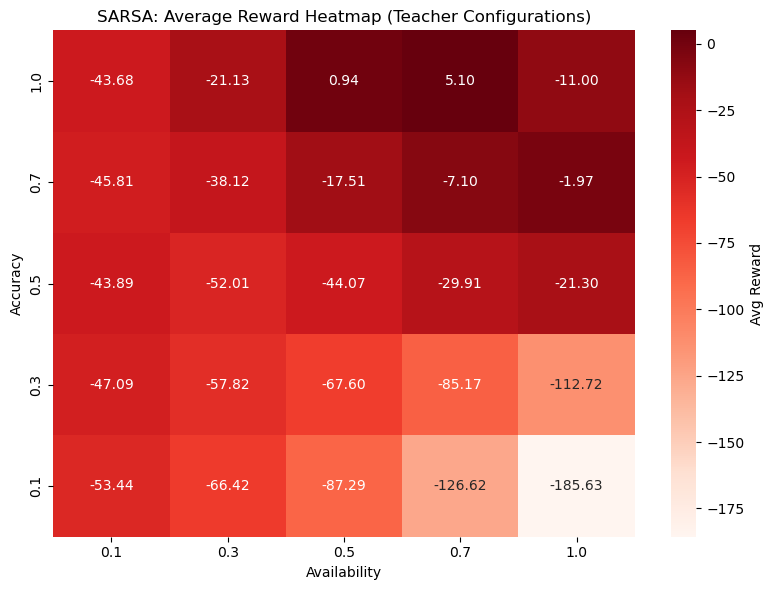

In [45]:
df_sarsa = pd.DataFrame(results_sarsa)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df, metric, title):
    pivot = df.pivot(index='Accuracy', columns='Availability', values=metric)
    pivot = pivot.sort_index(ascending=False)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': metric})
    plt.title(title)
    plt.xlabel("Availability")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

plot_heatmap(df_sarsa, "Avg Reward", "SARSA: Average Reward Heatmap (Teacher Configurations)")


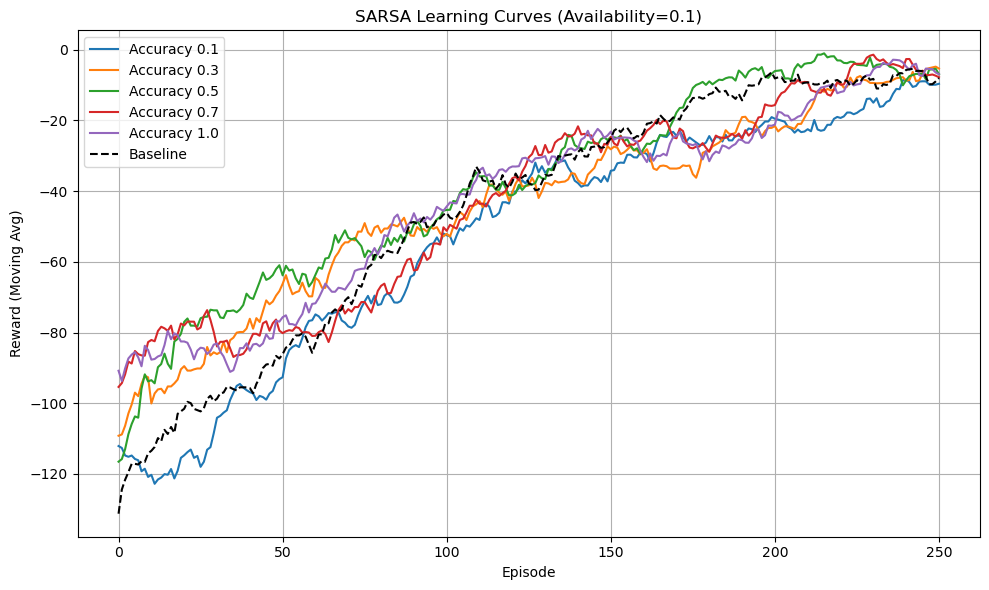

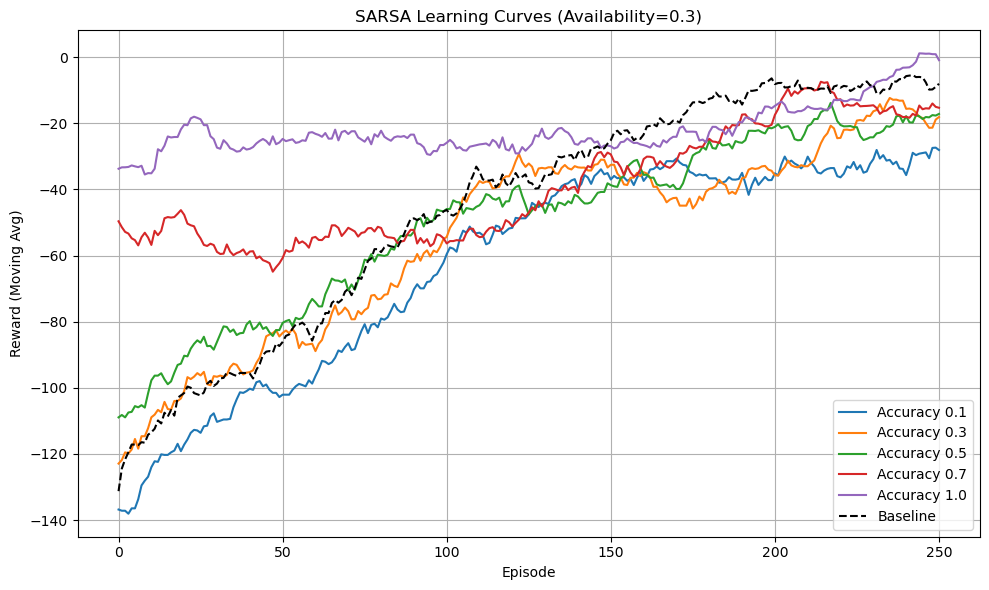

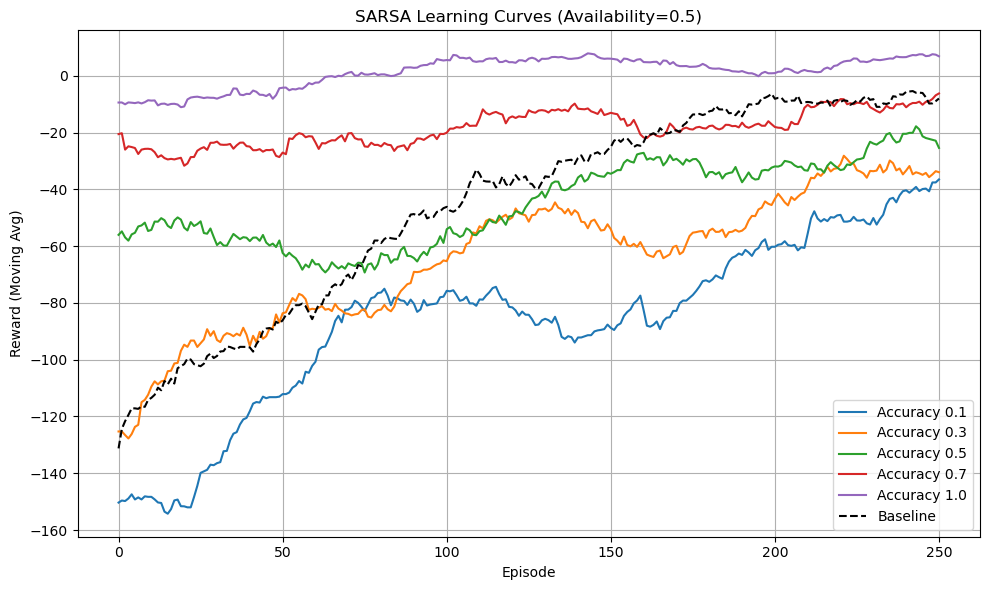

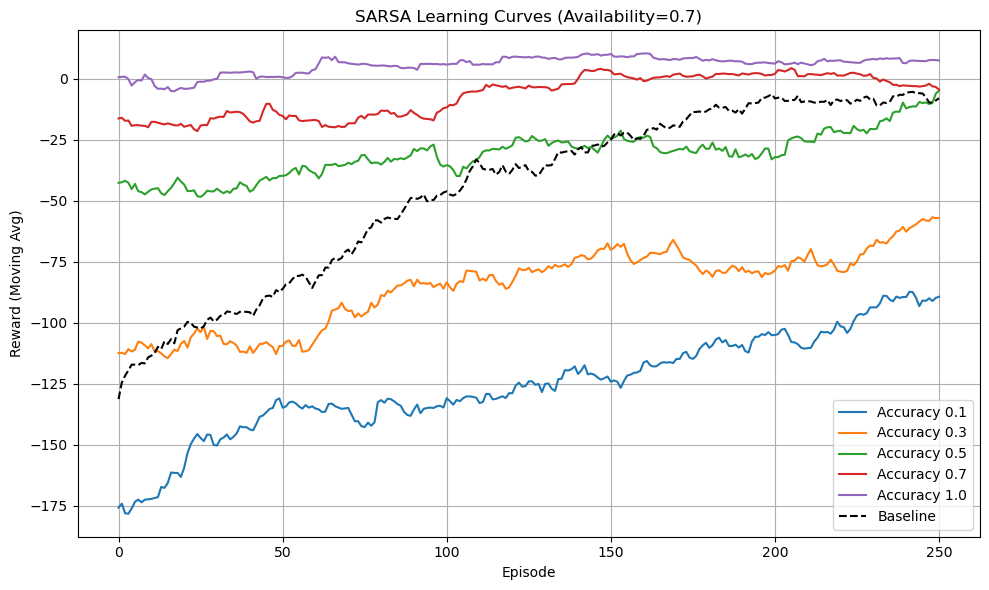

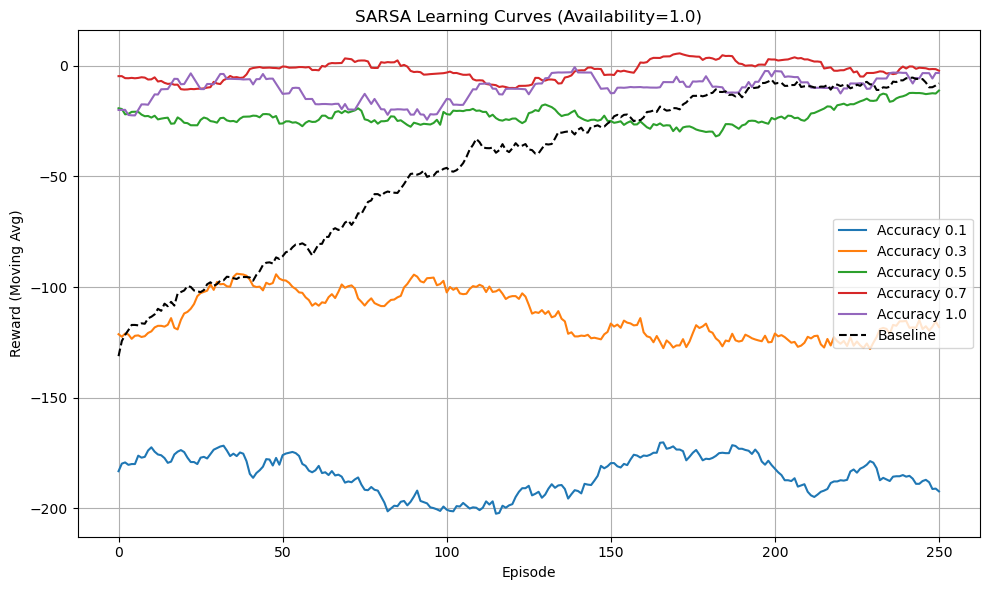

In [46]:
def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

def plot_learning_curves(availability, baseline_rewards, reward_curves):
    plt.figure(figsize=(10, 6))
    for acc in accuracy_values:
        rewards = reward_curves[(availability, acc)]
        plt.plot(moving_average(rewards), label=f"Accuracy {acc}")
    plt.plot(moving_average(baseline_rewards), label="Baseline", linestyle='--', color='black')
    plt.title(f"SARSA Learning Curves (Availability={availability})")
    plt.xlabel("Episode")
    plt.ylabel("Reward (Moving Avg)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 计算 baseline（无教师）
baseline_rewards, _, _ = train_sarsa_student_with_teacher(0.0, 0.0, teacher_q_sarsa * 0)

# 画多个 availability 对应图
for avail in availability_values:
    plot_learning_curves(avail, baseline_rewards, reward_curves_sarsa)


<Figure size 700x500 with 0 Axes>

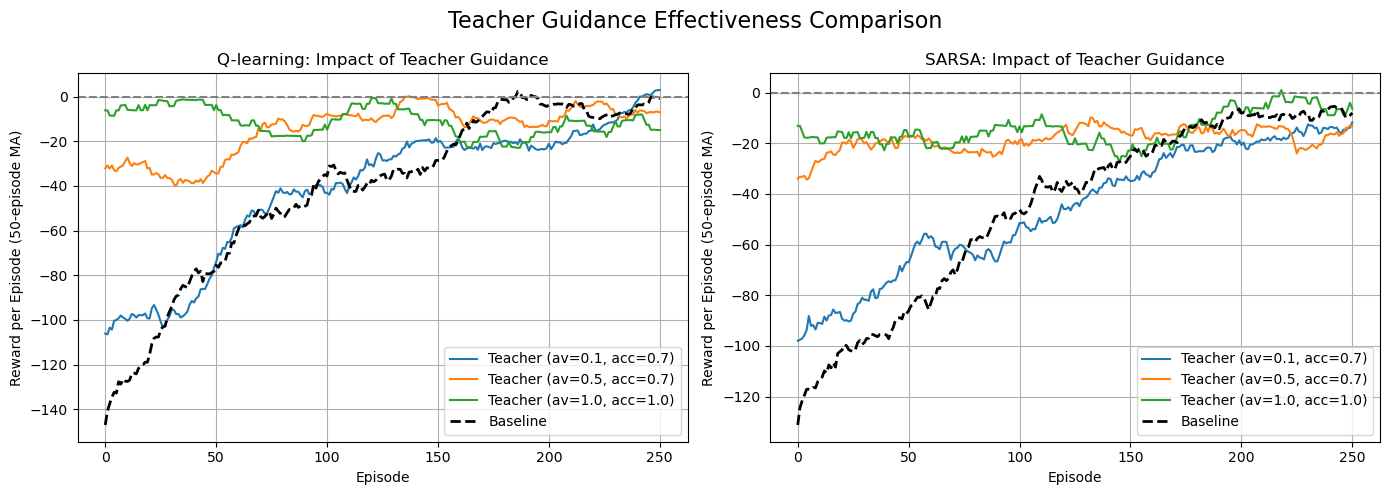

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 选择三个组合
selected_configs = [
    (0.1, 0.7),
    (0.5, 0.7),
    (1.0, 1.0),
]

# 开始绘图
plt.figure(figsize=(14, 5))

# === 左图：Q-learning ===
plt.subplot(1, 2, 1)
for avail, acc in selected_configs:
    rewards = q_results[(avail, acc)]
    plt.plot(moving_average(rewards), label=f"Teacher (av={avail}, acc={acc})")
plt.plot(moving_average(q_base), label="Baseline", linestyle='--', color='black', linewidth=2)
plt.title("Q-learning: Impact of Teacher Guidance")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode (50-episode MA)")
plt.legend()
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)

# === 右图：SARSA ===
plt.subplot(1, 2, 2)
for avail, acc in selected_configs:
    rewards = sarsa_results[(avail, acc)]
    plt.plot(moving_average(rewards), label=f"Teacher (av={avail}, acc={acc})")
plt.plot(moving_average(sarsa_base), label="Baseline", linestyle='--', color='black', linewidth=2)
plt.title("SARSA: Impact of Teacher Guidance")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode (50-episode MA)")
plt.legend()
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)

# 图标题与注释
plt.suptitle("Teacher Guidance Effectiveness Comparison", fontsize=16)

plt.tight_layout()
plt.show()
